In [73]:
from PIL import Image
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import pandas
from pandas.tools.plotting import scatter_matrix
path="C:/imfaa/"
X=[]
y=[]
for directory in os.listdir(path):
    for file in os.listdir(path+directory):
        #print(path+directory+"/"+file)
        img=Image.open(path+directory+"/"+file)
        print(img)
        width, height = img.size
        for i in range(width):
            for j in range(height):
                RGB =img.getpixel((i,j))
                #print(rgb)
                featurevector= img.getpixel((i,j))
                #print(featurevector)
                X.append(featurevector)
                if directory == "black":
                    label = 0
                #if directory == "grey":
                    #label = 1
                if directory == "white":
                    label = 2
                y.append(label)
                #print(label)
#clf = RandomForestClassifier(n_estimators=20)
#num_sample=size(img)
#label=np.ones((num_sample,),dtype=int)
#label[0:13]=0
#label[13:27]=1
#label[27:]=2

#print(X)

clf=AdaBoostClassifier(n_estimators=30)
scores = cross_val_score(clf, X, y)
print(scores.mean())

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=36x40 at 0x100E6358>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=27x29 at 0x8E225F8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=24x25 at 0xEA8CDA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=24x25 at 0x8E22630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=25x38 at 0xD9829E8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=46x29 at 0x8E225F8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=42x42 at 0x8D9CCC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=16x15 at 0x8E226D8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=31x40 at 0x8E22630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=39x37 at 0xD9829E8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=52x27 at 0x8D9CCC0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=27x25 at 0x8E226D8>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=27x33 at 0xD9829E8>
<PIL.JpegImagePlugin.Jpe

In [74]:
from sklearn import model_selection
validation_size = 0.20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=5)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.neural_network import MLPClassifier
#from sklearn import svm
#nn = svm.SVC(gamma=0.0001, C=300.)
nn = MLPClassifier(hidden_layer_sizes=(4,5),max_iter=200)
nn.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [77]:
predictions = nn.predict(X_test)

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[25918     0]
 [    0 49385]]


In [79]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     25918
          2       1.00      1.00      1.00     49385

avg / total       1.00      1.00      1.00     75303



In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

#digits = load_digits()
#X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [13]:
%gui qt
from __future__ import division, print_function
%matplotlib inline
import skimage
from scipy import ndimage as ndi
from matplotlib import pyplot as plt
from PIL import Image
import os
from skimage import io
path1="C:/a/"
for file in os.listdir(path1):
        img1=Image.open(path1+"/"+file)
from pylab import *

# read image to array
im = img1.convert('L')

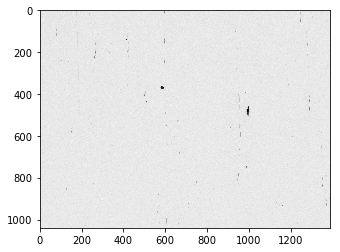

In [14]:
import scipy.ndimage as ndi
im_med = ndi.median_filter(im, size=1)
plt.imshow(im_med, cmap=plt.cm.gray, interpolation='nearest')

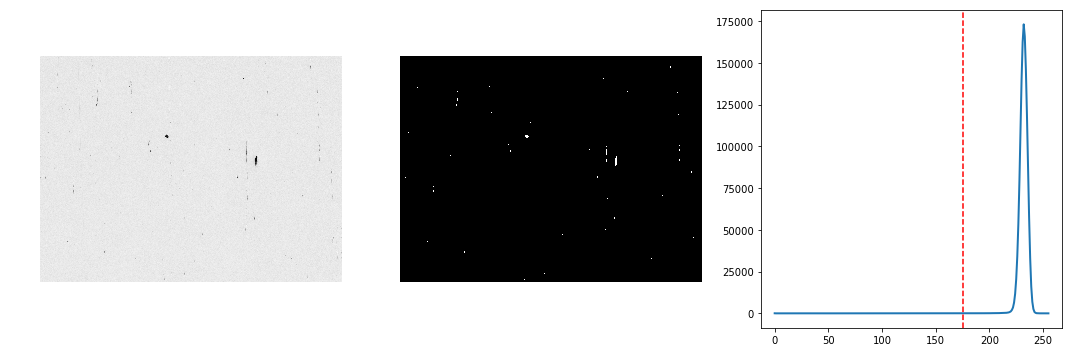

175


In [15]:
from skimage import data
from skimage import filters
from skimage import exposure
val = filters.threshold_otsu(im_med)
hist, bins_center = exposure.histogram(im_med)
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(im, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(im_med < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='r', ls='--')
plt.tight_layout()
plt.show()
print(val)

C:/imfaa/white/03_Perlit_01.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0xE77F0B8>


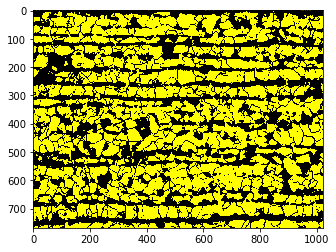

In [81]:
path1="C:/amit/"
for file in os.listdir(path1):
        print(path1+directory+"/"+file)
        img1=Image.open(path1+"/"+file)
        width1, height1 = img1.size
        print(img1)
        #seg = Image.new("RGB",(width1,height1),"white")
        #print(seg)
        for i in range(width1):
            for j in range(height1):
                rgb =img1.getpixel((i,j))
                #print(rgb)
                featurevector= img1.getpixel((i,j))
                featurevector = scaler.transform([featurevector])
                #print(featurevector)
                t = nn.predict(featurevector)
                #print(t)
                if t == 0:
                    img1.putpixel((i,j),(0,0,0))
                if t == 2:
                    img1.putpixel((i,j),(255,255,0))
                #if t == 1:
                    #img1.putpixel((i,j),(255,255,255))
                    #break
img1.save("C:/final1/per1.jpg")
plt.imshow(img1)

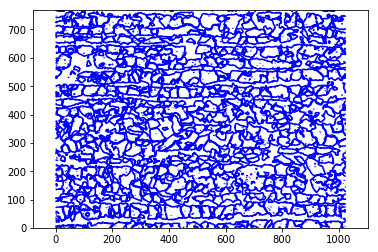

In [82]:
from pylab import *

# read image to array
img2 = img1.convert('L')

# create a new figure
figure()

# show contours with origin upper left corner

img3 = contour(img2, levels=[50], colors='blue', origin='image')
axis('equal')

#img3.save("C:/final1/porosity21.jpg")
show()

In [83]:
pores=0
surface=0
unlabelled=0
for pixel in img1.getdata():
    if pixel == (0,0,0):
        pores += 1
    elif pixel == (255,255,0):
        surface += 1
    else:
        unlabelled += 1
print('pores=' + str(pores)+', surface='+str(surface))
print ()
Relative_pores= ((pores)/((pores) + (surface)))
Relative_surface= (1-(Relative_pores))
print(Relative_pores)
print(Relative_surface)

pores=333190, surface=453242

0.42367299397786456
0.5763270060221355


In [ ]:
import sys

from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average
from __future__ import division, print_function
%matplotlib inline
import skimage
from scipy import ndimage as ndi
from skimage import io
import os
filename = os.path.join(skimage.data_dir, 'C:/Users/AMIT/Pictures/final1.jpg')
filename2 = os.path.join(skimage.data_dir, 'C:/Users/AMIT/Pictures/final.jpg')

from skimage import io
img2 = io.imread(filename)
img = io.imread(filename2)
from skimage import data
plt.imshow(img)
plt.imshow(img2)

In [ ]:
Image.alpha_composite(img, img2)

In [ ]:
from PIL import ImageChops
def equal(img, img2):
    return ImageChops.difference(img, img2).getbbox() is None

In [ ]:
ImageChops.composite(img, img2,"RGB")

In [ ]:
import math, operator

def rmsdiff(img, img2):
    "Calculate the root-mean-square difference between two images"

    h = ImageChops.difference(img, img2).histogram()

    # calculate rms
    return math.sqrt(reduce(operator.add, map(lambda h, i: h*(i**2), h, range(256))) / (float(img.size[0]) * img2.size[1]))

In [ ]:
def main():
    file, file1 = sys.argv[1:1+2]
    # read images as 2D arrays (convert to grayscale for simplicity)
    img = to_grayscale(imread(file1).astype(float))
    img2 = to_grayscale(imread(file2).astype(float))
    # compare
    n_m, n_0 = compare_images(img, img2)
    print ("Manhattan norm:", n_m, "/ per pixel:", n_m/img.size)
    print ("Zero norm:", n_0, "/ per pixel:", n_0*1.0/img2.size)

In [ ]:
def compare_images(img, img2):
    # normalize to compensate for exposure difference, this may be unnecessary
    # consider disabling it
    img1= normalize(img)
    img2 = normalize(img2)
    # calculate the difference and its norms
    diff = img - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

In [ ]:
def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

In [ ]:
def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

In [ ]:
if __name__ == "__main__":
    main()

Automatically created module for IPython interactive environment


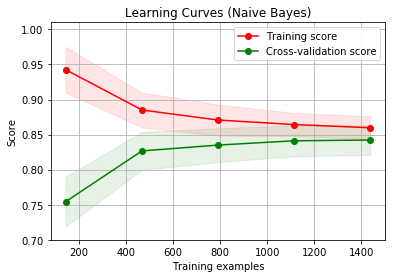

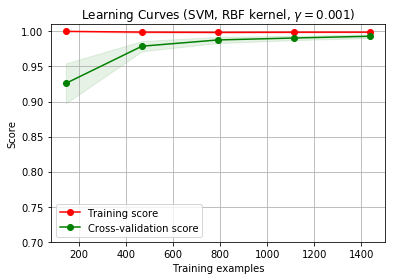

In [73]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
men_means = (57.63,56.62,58.80,59.97,58.24,58.75,57.22,57.45,58.01,58.46)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 5 or scalar